Prediction: [[ 8176.01170857 18650.60830381 26826.62001238]]


Actual Values: [[ 4258.2 23687.2 27945.4]]


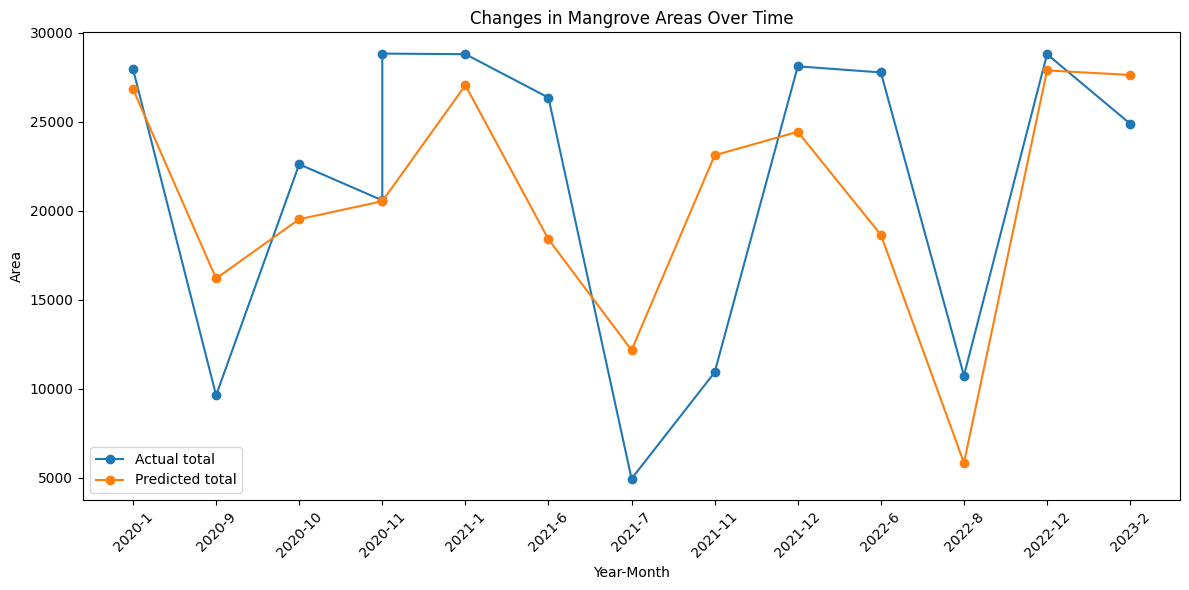

Mean Squared Error: 39736400.11282536
Root Mean Squared Error (RMSE): 6303.681472982701
R-squared: 0.24024886198287468
Mean Absolute Error (MAE): 5208.407454739231
Explained Variance Score: 0.28950489108939575
Adjusted R-squared: 0.10211229143430633


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, explained_variance_score
import numpy as np

# Read the merged CSV file
df = pd.read_csv('combined.csv')

# df[''] = pd.to_datetime(df['time'])
# df['month'] = df['time'].dt.month
# df['year'] = df['time'].dt.year
# df = df[df['area_x'] >= 1000]
# df = df[df['area_y'] >= 1000]
# df = df[df['area'] >= 1000]

# Select the relevant columns for training
features = ['month', 'year']
target = ['mangrove', 'closed', 'regular', 'healthy', 'unhealthy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)



# Make Predictions
new_data = pd.DataFrame({'month': [1], 'year': [2020]})  # Example input for prediction
prediction = model.predict(new_data)
print('Prediction:', prediction)
print("\n")

# Get the actual values from the CSV
actual_data = df.loc[(df['month'] == new_data['month'].iloc[0]) & (df['year'] == new_data['year'].iloc[0]), ['area_x', 'area_y', 'area']]
if not actual_data.empty:
    actual_values = actual_data.values
    print('Actual Values:', actual_values)
else:
    print('No actual values found for the given input')
    
# Prepare the data for plotting
df_plot = pd.DataFrame({'Year': X_test['year'], 'Month': X_test['month'], 'Actual area_x': y_test['area_x'],
                        'Predicted area_x': y_pred[:, 0], 'Actual area_y': y_test['area_y'],
                        'Predicted area_y': y_pred[:, 1], 'Actual area': y_test['area'],
                        'Predicted area': y_pred[:, 2]})

# Sort the data by year and month
df_plot = df_plot.sort_values(['Year', 'Month'])

# Create a single index combining year and month
df_plot['Year-Month'] = df_plot['Year'].astype(str) + '-' + df_plot['Month'].astype(str)

# Plot the changes in area
plt.figure(figsize=(12, 6))
#plt.plot(df_plot['Year-Month'], df_plot['Actual area_x'], 'o-', label='Actual closed')
#plt.plot(df_plot['Year-Month'], df_plot['Predicted area_x'], 'o-', label='Predicted closed')
#plt.plot(df_plot['Year-Month'], df_plot['Actual area_y'], 'o-', label='Actual regular')
#plt.plot(df_plot['Year-Month'], df_plot['Predicted area_y'], 'o-', label='Predicted regular')
plt.plot(df_plot['Year-Month'], df_plot['Actual area'], 'o-', label='Actual total')
plt.plot(df_plot['Year-Month'], df_plot['Predicted area'], 'o-', label='Predicted total')
plt.xlabel('Year-Month')
plt.ylabel('Area')
plt.title('Changes in Mangrove Areas Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (coefficient of determination)
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors
r_squared = model.score(X_test, y_test)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

In [2]:
# Access the last elements of 'year' and 'month' columns in df_plot
last_year = df_plot['Year'].iloc[-1]
last_month = df_plot['Month'].iloc[-1]

# Print the last year and month
print('Last Year:', last_year)
print('Last Month:', last_month)

Last Year: 2023
Last Month: 2


In [27]:
new_data1 = pd.DataFrame({'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          'year': [last_year+1, last_year+1, last_year+1, last_year+1, last_year+1,last_year+1,last_year+1,last_year+1,last_year+1,last_year+1,last_year+1,last_year+1]})


In [28]:
predictions = model.predict(new_data1)

print(predictions)

[[ 8487.95309222  9293.80506698 17781.75815921]
 [ 2380.80524667 25237.00379333 27617.80904   ]
 [ 3851.90110095 23245.64786381 27097.54896476]
 [ 5027.68831619 20614.5024581  25642.19077429]
 [ 7932.0843     18641.1568     26573.2411    ]
 [ 8667.829      15583.2968     24251.1258    ]
 [ 5315.85706667 10442.632      15758.48906667]
 [ 3063.66708571  5642.9868      8706.65388571]
 [ 7390.08119238  9861.96302    17252.04421238]
 [ 9884.05860571 11504.12280667 21388.18141238]
 [10646.90336667 12169.22291333 22816.12628   ]
 [ 9593.05866    18277.96166    27871.02032   ]]


In [29]:
future_predictions = pd.DataFrame({'Year': new_data1['year'], 'Month': new_data1['month'],
                                   'Predicted area_x': predictions[:, 0],
                                   'Predicted area_y': predictions[:, 1],
                                   'Predicted area': predictions[:, 2]})


In [30]:
df_plot1 = pd.concat([df_plot, future_predictions], ignore_index=True)


In [31]:
df_plot1 = df_plot1.sort_values(['Year', 'Month'])

df_plot1['Year-Month'] = df_plot1['Year'].astype(str) + '-' + df_plot1['Month'].astype(str)


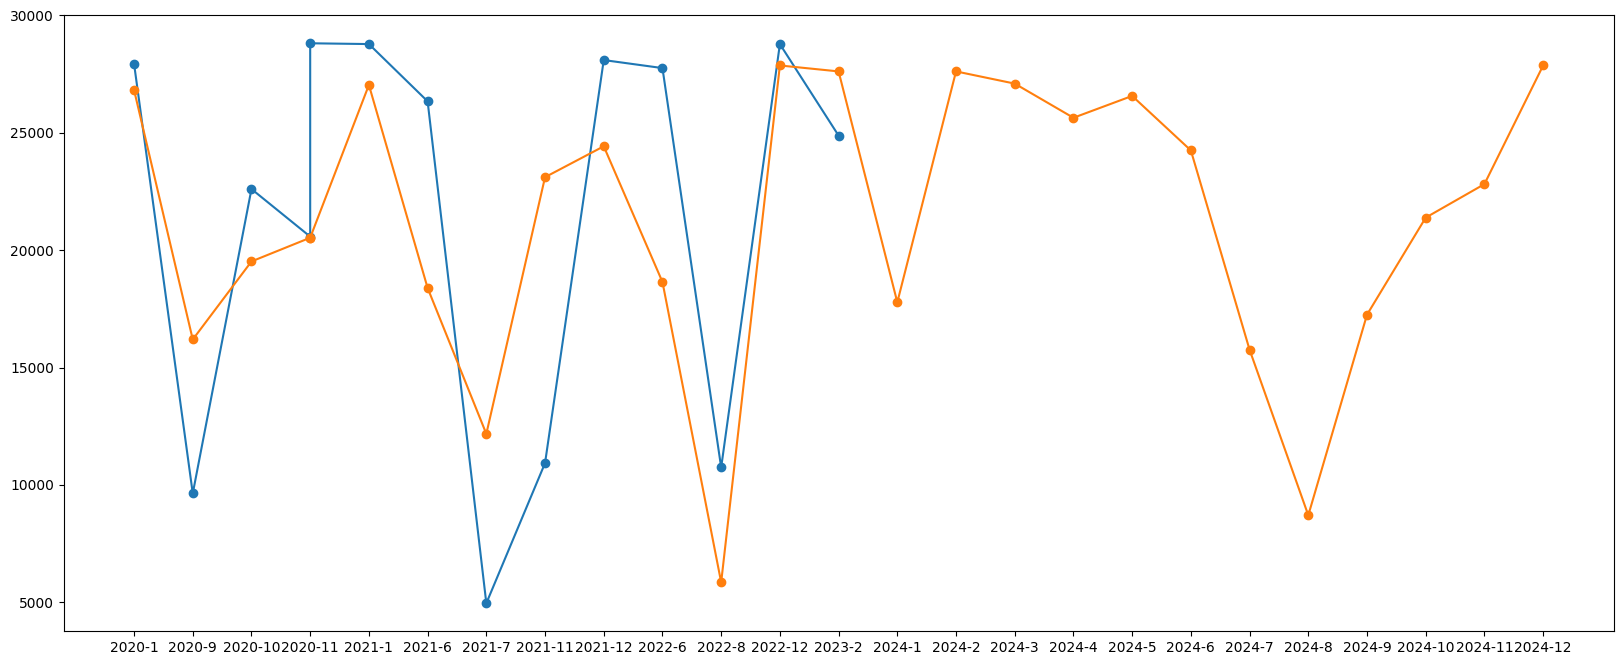

In [34]:
plt.figure(figsize=(20, 8))

plt.plot(df_plot1['Year-Month'], df_plot1['Actual area'], 'o-', label='Actual total')
plt.plot(df_plot1['Year-Month'], df_plot1['Predicted area'], 'o-', label='Predicted total')
# plt.plot(df_plot['Year-Month'], df_plot['Predicted area_x'], 'o-', label='Predicted area_x')
# plt.plot(df_plot['Year-Month'], df_plot['Predicted area_y'], 'o-', label='Predicted area_y')
